## Imports

In [1]:
# main libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Markdown

In [2]:
!pip install geoplot
!apt-get install -y graphviz libgraphviz-dev
!pip install pygraphviz
!pip install pyvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 19.9 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 29 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64

In [3]:
# geo libraries

import geopandas as gpd
import geoplot as gplt
import plotly.graph_objects as go
import networkx as nx
import pygraphviz
from pyvis.network import Network

# Week 1

,geo,TIME_PERIOD,OBS_VALUE
0,AT,1998,7971116
1,AT,1999,7982461
2,AT,2000,8002186
3,AT,2001,8032926
4,AT,2002,8063640
...,...,...,...
625,SK,2020,5457873
626,SK,2021,5459781
627,SK,2022,5434712
628,SK,2023,5428792


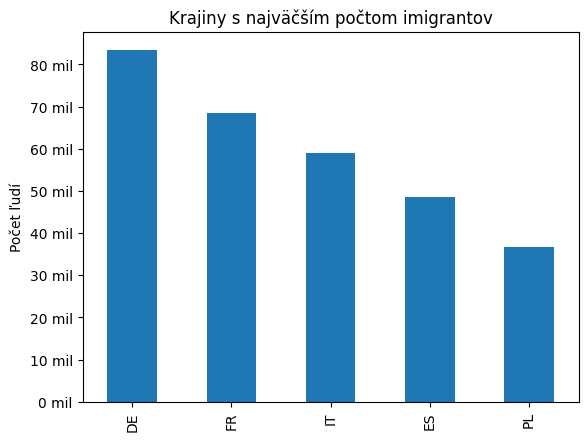

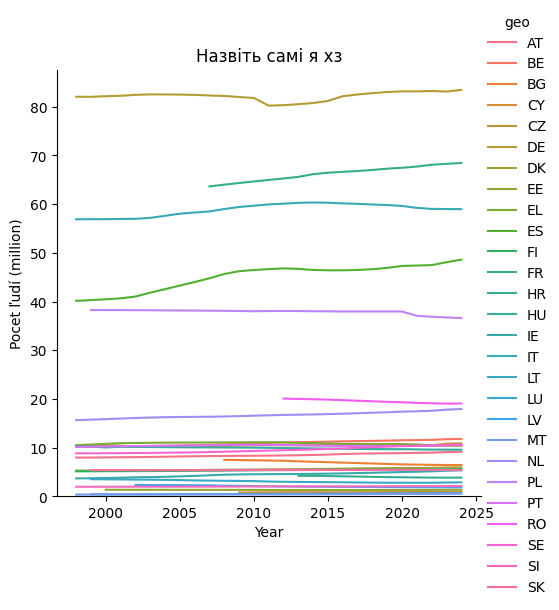

In [4]:
url = "https://raw.githubusercontent.com/loveBeatles/datavis_project/main/data/GeneralEU1.csv"

# Чтение CSV файла
df = pd.read_csv(url).drop(['STRUCTURE','STRUCTURE_ID', 'CONF_STATUS', 'OBS_FLAG', 'freq'], axis=1)
# Отображаем данные
df_without_genders = df.groupby(['geo', 'TIME_PERIOD'])['OBS_VALUE'].sum().reset_index()
df_sorted_by_number_immigrates = df_without_genders[df_without_genders['TIME_PERIOD'] == 2024].sort_values(by="OBS_VALUE", ascending=False)
display(df_without_genders)
plot_for_number_immigrates = df_sorted_by_number_immigrates[:5].plot(x='geo',
                                                                     y='OBS_VALUE',
                                                                     kind='bar',
                                                                     ylabel='Počet ľudí',
                                                                     xlabel='',
                                                                     title='Krajiny s najväčším počtom imigrantov',
                                                                     legend=False)
plot_for_number_immigrates.ticklabel_format(style='plain', axis='y')
plot_for_number_immigrates.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x/1_000_000:g} mil"))
#sns.barplot(data=df_sorted_by_number_immigrates[:5], x='OBS_VALUE', y='geo')
df_ = df.groupby(['geo', 'TIME_PERIOD'])['OBS_VALUE'].sum().reset_index()
df_['OBS_VALUE_milion'] = df_['OBS_VALUE'] /1000000
grid = sns.relplot(data=df_, x='TIME_PERIOD', y='OBS_VALUE_milion',
                   hue='geo', kind="line")
grid.set_axis_labels('Year', 'Pocet ľudí (million)')
grid.set(title='Назвіть самі я хз')
plt.ylim(0, )

plt.show()

In [5]:
url1 = "https://raw.githubusercontent.com/loveBeatles/datavis_project/main/data/points_of_country.csv"
data_frame_by_points_of_country = pd.read_csv(url1).drop(['ISO-ALPHA-3','IOC', 'FIFA'], axis=1)
data = {
    "geo": list(df['geo'].unique())
}
data_frame_by_points_of_country = data_frame_by_points_of_country.iloc[:, :4]

nove = pd.DataFrame(data)
points = pd.merge(nove, data_frame_by_points_of_country, left_on='geo', right_on='ISO-ALPHA-2')
points = points.query('Country != "East Germany" and Country != "German Democratic Republic" and Country != "West Germany"')
points = points.drop_duplicates(subset=['ISO-ALPHA-2'], keep='first')
points = points.drop('ISO-ALPHA-2',axis=1)
nove_frame = pd.merge(points, df_sorted_by_number_immigrates, on="geo")


display(nove_frame)

fig = px.scatter_geo(
    nove_frame,
    lat="Latitude",
    lon="Longitude",
    size="OBS_VALUE",
    hover_name="Country"
    )
fig.update_geos(
    projection_type="azimuthal equal area",
    lonaxis_range= [-20, 40],
    lataxis_range= [20, 70],
    showcountries = True
)
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


,geo,Country,Latitude,Longitude,TIME_PERIOD,OBS_VALUE
0,AT,Austria,47.516231,14.550072,2024,9158750
1,BE,Belgium,50.503887,4.469936,2024,11817096
2,BG,Bulgaria,42.733883,25.485830,2024,6445481
3,CY,Cyprus,35.126413,33.429859,2024,966365
4,CZ,Czech Republic,49.817492,15.472962,2024,10900555
5,DE,Germany,51.165691,10.451526,2024,83456045
6,DK,Denmark,56.263920,9.501785,2024,5961249
7,EE,Estonia,58.595272,25.013607,2024,1374687
8,ES,Spain,40.463667,-3.749220,2024,48619695
9,FI,Finland,61.924110,25.748151,2024,5603851


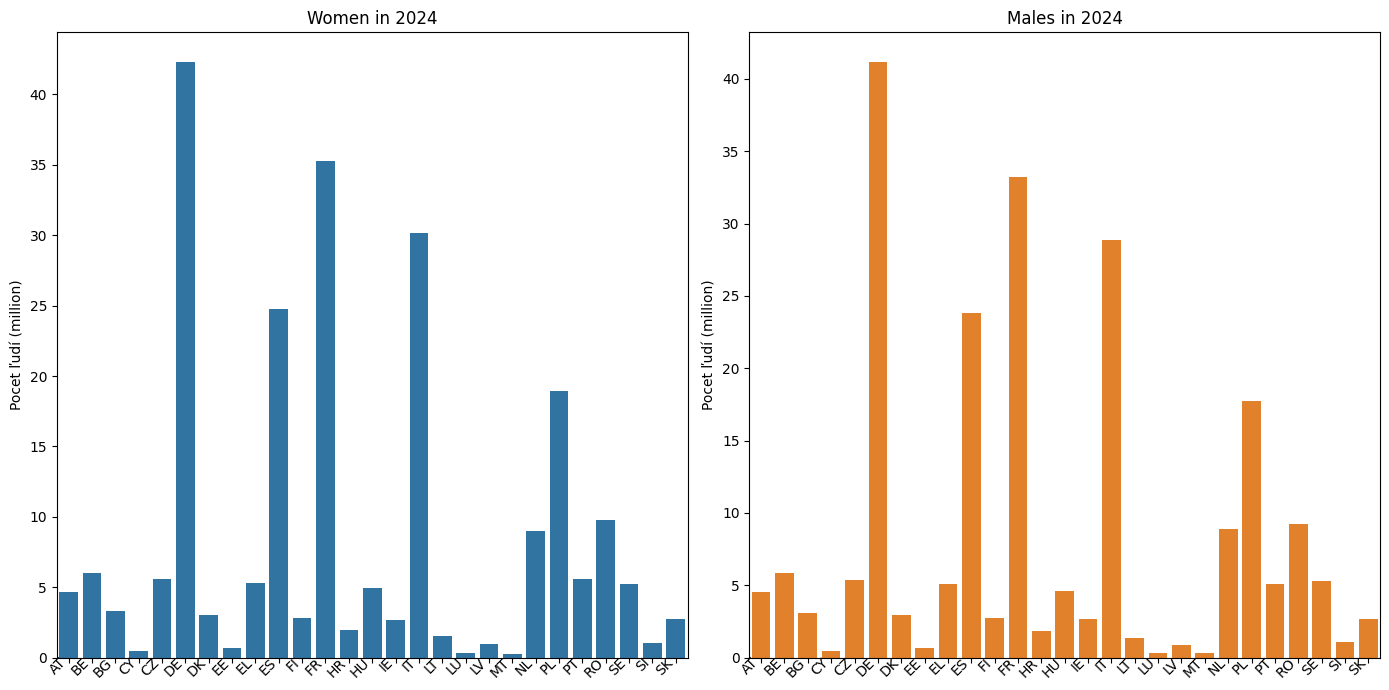

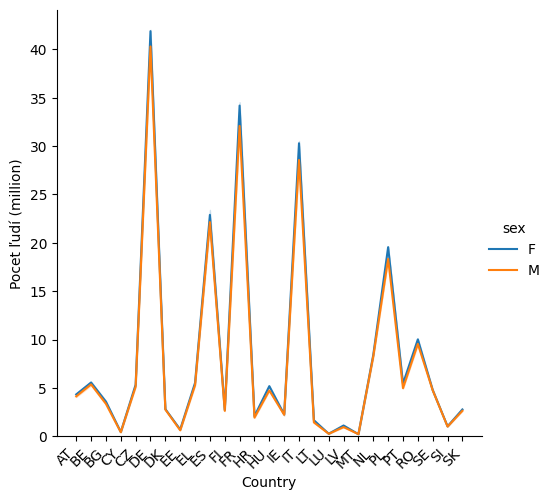

In [6]:
df['OBS_VALUE_milion'] = df['OBS_VALUE'] /1000000
df_males = df[df['sex']=='M']
df_females = df[df['sex']=='F']
df_females = df_females.query('TIME_PERIOD==2024')
df_males = df_males.query('TIME_PERIOD==2024')
df_females['OBS_VALUE_milion'] = df_females['OBS_VALUE'] /1000000
df_males['OBS_VALUE_milion'] = df_males['OBS_VALUE'] /1000000


fig, axes = plt.subplots(1, 2, figsize=(14, 7))
def rotate_bar_labels(axes, angle=45):
    axes.tick_params(axis='x', labelrotation=angle, pad=-5)
    plt.setp(axes.get_xticklabels(), ha='right')

sns.barplot(data=df_females, x='geo', y='OBS_VALUE_milion', color="C0", ax=axes[0])
axes[0].set_ylabel('Pocet ľudí (million)')
axes[0].set_xlabel(None)
axes[0].set_title('Women in 2024')
rotate_bar_labels(axes[0])

sns.barplot(data=df_males, x='geo', y='OBS_VALUE_milion', color="C1", ax=axes[1])
axes[1].set_ylabel('Pocet ľudí (million)')
axes[1].set_xlabel(None)
axes[1].set_title('Males in 2024')

rotate_bar_labels(axes[1])

plt.tight_layout()
grid = sns.relplot(data=df, x='geo', y='OBS_VALUE_milion',
                   hue='sex', kind="line")
grid.set_axis_labels('Country', 'Pocet ľudí (million)')
grid.set(title='')
plt.ylim(0, )
plt.xticks(rotation=45, ha='right')

plt.show()


,age,OBS_VALUE_milion
0,Y10-14,23.490428
1,Y15-19,23.944446
2,Y15-64,286.491649
3,Y20-24,24.016829
4,Y25-29,25.195481
5,Y30-34,27.591348
6,Y35-39,29.342176
7,Y40-44,30.560417
8,Y45-49,31.183160
9,Y5-9,22.342857


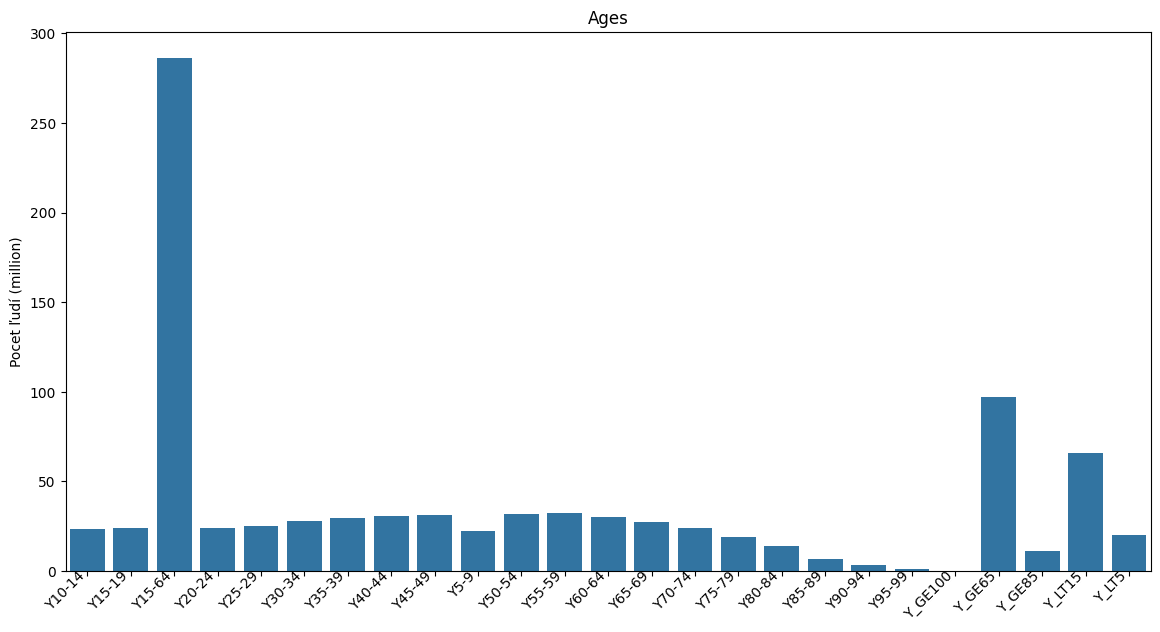

In [29]:
url2 = "https://raw.githubusercontent.com/loveBeatles/datavis_project/main/data/age_data.csv"
data_frame_by_ages = pd.read_csv(url2).drop(['STRUCTURE','STRUCTURE_ID', 'freq','unit','OBS_FLAG','CONF_STATUS'], axis=1)
data_frame_by_ages_without_gender = data_frame_by_ages.query('TIME_PERIOD==2024')
data_frame_by_ages_without_gender = data_frame_by_ages_without_gender.query('sex=="T"')
data_frame_by_ages_without_gender['OBS_VALUE_milion'] = data_frame_by_ages_without_gender['OBS_VALUE'] /1000000
data_frame_by_ages_without_gender = data_frame_by_ages_without_gender.groupby('age')['OBS_VALUE_milion'].sum().reset_index()
fig, axes = plt.subplots(1, 1, figsize=(14, 7))
display(data_frame_by_ages_without_gender)
def rotate_bar_labels(axes, angle=45):
    axes.tick_params(axis='x', labelrotation=angle, pad=-5)
    plt.setp(axes.get_xticklabels(), ha='right')

sns.barplot(data=data_frame_by_ages_without_gender, x='age', y='OBS_VALUE_milion', color="C0", ax=axes)
axes.set_ylabel('Pocet ľudí (million)')
axes.set_xlabel(None)
axes.set_title('Ages')
rotate_bar_labels(axes)